TEXT DATA EDA

Perform basic EDA and Data cleaning:
-   Check for missing values; address any missing data accordingly

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter
import re

nlp = spacy.load("en_core_web_sm")

df = pd.read_csv('tripadvisor_hotel_reviews.csv')

df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


-   Apply methods to remove stopwords and lemmatize words

In [29]:
print("Missing Values:\n", df.isnull().sum())

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned_review'] = df['Review'].apply(clean_text)
df['num_sentences'] = df['Review'].apply(lambda x: len(x.split('.')))
df['raw_review_length'] = df['Review'].apply(len)
df['raw_word_count'] = df['Review'].apply(lambda x: len(x.split()))


def preprocess_text(text):
    doc = nlp(text)
    lemmatized = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(lemmatized)

df['processed_review'] = df['cleaned_review'].apply(preprocess_text)

df['processed_review_length'] = df['processed_review'].apply(len)
df['processed_word_count'] = df['processed_review'].apply(lambda x: len(x.split()))
df.head(10)


Missing Values:
 Review    0
Rating    0
dtype: int64


,Review,Rating,cleaned_review,num_sentences,raw_review_length,raw_word_count,processed_review,processed_review_length,processed_word_count
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,1,593,87,nice hotel expensive parking get good deal sta...,528,81
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,5,1689,250,ok special charge diamond member hilton decide...,1504,227
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattl...,8,1427,217,nice room experience hotel monaco seattle good...,1291,199
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,1,600,89,unique great stay wonderful time hotel monaco ...,549,85
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,2,1281,191,great stay great stay go seahawk game awesome ...,1121,178
5,love monaco staff husband stayed hotel crazy w...,5,love monaco staff husband stayed hotel crazy w...,2,1002,134,love monaco staff husband stay hotel crazy wee...,906,128
6,"cozy stay rainy city, husband spent 7 nights m...",5,cozy stay rainy city husband spent nights mon...,5,748,101,cozy stay rainy city husband spend night monac...,680,95
7,"excellent staff, housekeeping quality hotel ch...",4,excellent staff housekeeping quality hotel cho...,4,597,85,excellent staff housekeeping quality hotel cho...,534,80
8,"hotel stayed hotel monaco cruise, rooms genero...",5,hotel stayed hotel monaco cruise rooms generou...,2,419,59,hotel stay hotel monaco cruise room generous d...,382,58
9,excellent stayed hotel monaco past w/e delight...,5,excellent stayed hotel monaco past we delight ...,1,271,35,excellent stay hotel monaco past delight recep...,252,34


-   Break-down sentences into words for word-level analysis

In [30]:
raw_word_list = ' '.join(df['Review']).lower().split()
processed_word_list = ' '.join(df['processed_review']).split()

raw_word_counts = Counter(raw_word_list).most_common(10)
processed_word_counts = Counter(processed_word_list).most_common(10)

raw_common_words_df = pd.DataFrame(raw_word_counts, columns=['word', 'count'])
processed_common_words_df = pd.DataFrame(processed_word_counts, columns=['word', 'count'])

Visualization
- Visualize review length, word counts and sentences length using bar plots and
kdeplots

/tmp/ipykernel_8356/1074570500.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['raw_review_length'], shade=True, color="blue")
/tmp/ipykernel_8356/1074570500.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['processed_review_length'], shade=True, color="orange")
/tmp/ipykernel_8356/1074570500.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['raw_word_count'], shade=True, color="green")
/tmp/ipykernel_8356/1074570500.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['proces

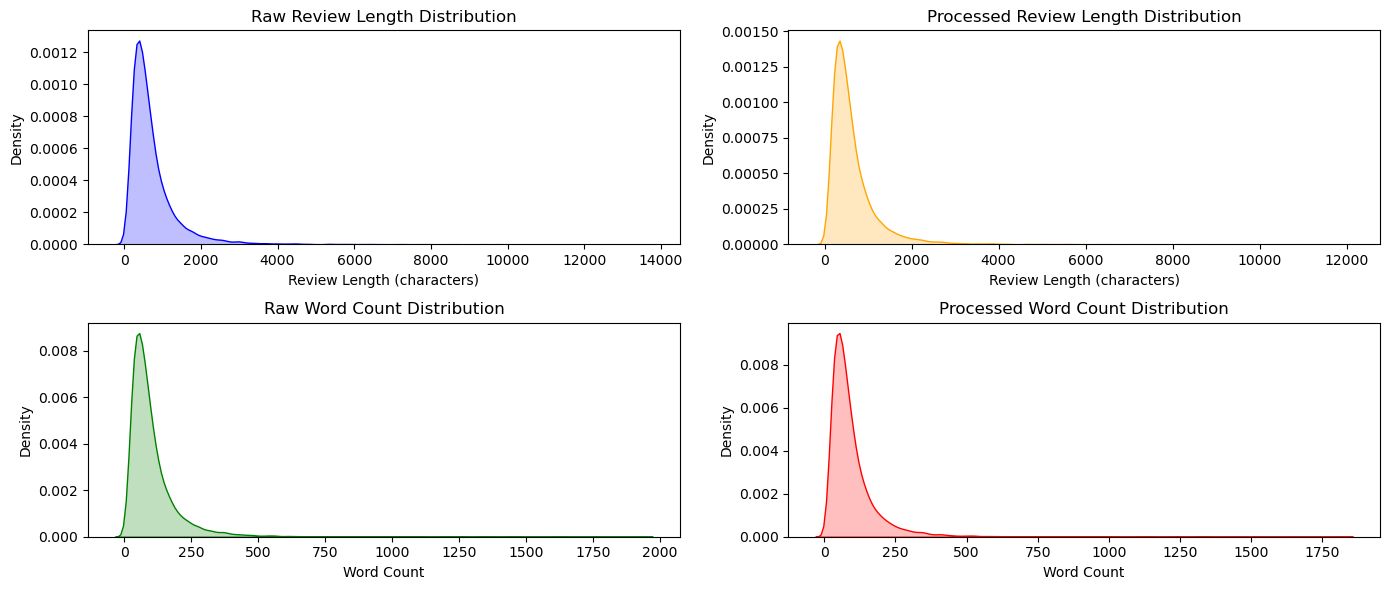

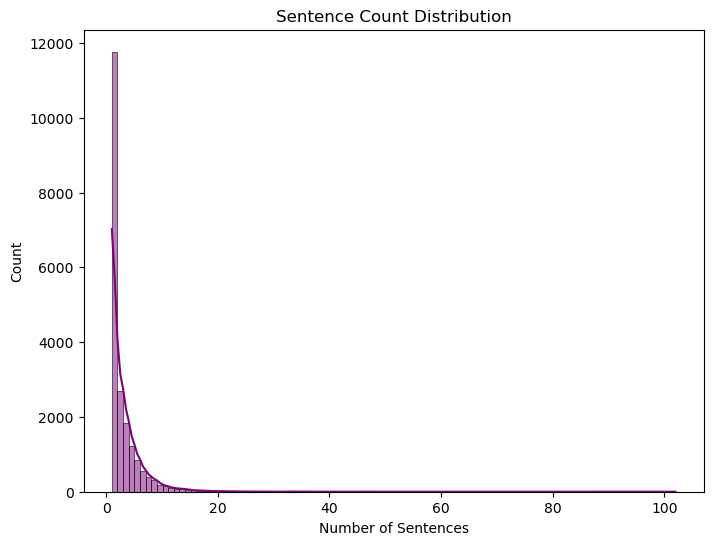

In [31]:
from matplotlib.ticker import MaxNLocator


plt.figure(figsize=(14, 6))

#Review Length KDE Plot
# Raw Review Length KDE Plot
plt.subplot(2, 2, 1)
sns.kdeplot(df['raw_review_length'], shade=True, color="blue")
plt.title("Raw Review Length Distribution")
plt.xlabel("Review Length (characters)")

# Processed Review Length KDE Plot
plt.subplot(2, 2, 2)
sns.kdeplot(df['processed_review_length'], shade=True, color="orange")
plt.title("Processed Review Length Distribution")
plt.xlabel("Review Length (characters)")

#Word Count KDE Plot
# Raw Word Count KDE Plot
plt.subplot(2, 2, 3)
sns.kdeplot(df['raw_word_count'], shade=True, color="green")
plt.title("Raw Word Count Distribution")
plt.xlabel("Word Count")

# Processed Word Count KDE Plot
plt.subplot(2, 2, 4)
sns.kdeplot(df['processed_word_count'], shade=True, color="red")
plt.title("Processed Word Count Distribution")
plt.xlabel("Word Count")

plt.tight_layout()
plt.show()


# Sentence Count Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['num_sentences'], kde=True, color="purple", bins=100)
plt.title("Sentence Count Distribution")
plt.xlabel("Number of Sentences")
plt.show()

- Plot a bar plot with the top 10 most frequently occuring words

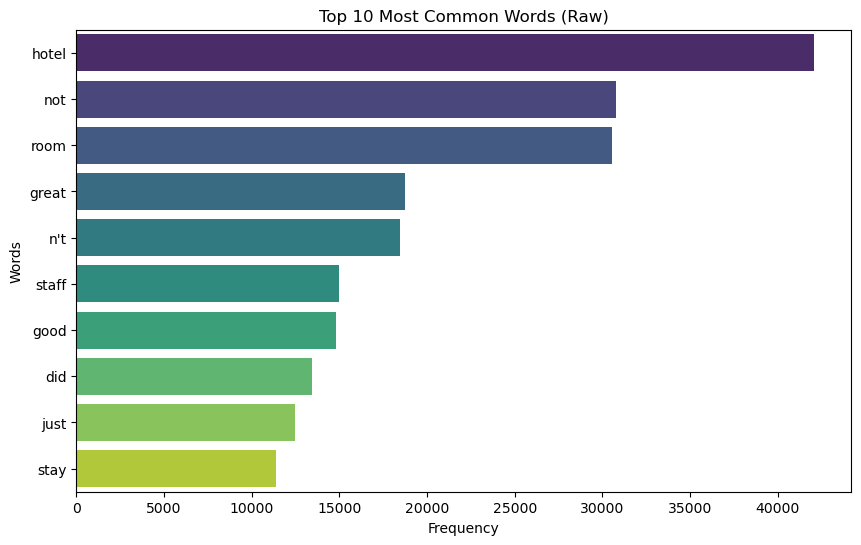

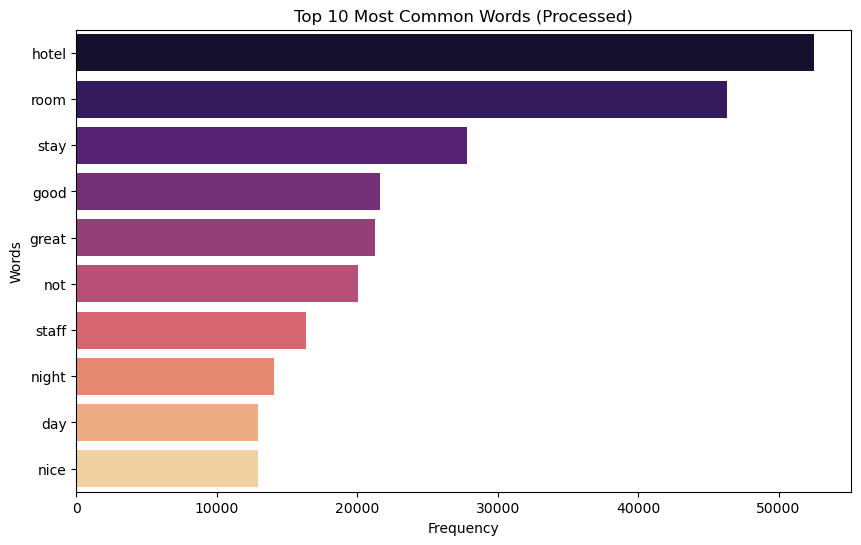

In [32]:
# Top 10 most common words before processing
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=raw_common_words_df, hue="word", palette='viridis', legend=False) 
plt.title("Top 10 Most Common Words (Raw)")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Top 10 most common words after processing
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=processed_common_words_df, hue='word', palette='magma', legend=False)
plt.title("Top 10 Most Common Words (Processed)")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

- Plot the top 10 most frequently occuring bi-grams and tri-grams


In [33]:
def get_ngrams(text, n=2):
    doc = nlp(text)
    ngrams = [tuple(doc[i:i+n]) for i in range(len(doc)-n+1)]
    return [' '.join([token.text for token in ngram]) for ngram in ngrams]

/tmp/ipykernel_8356/309536210.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=bigram_df, palette='Blues_d', legend=False)


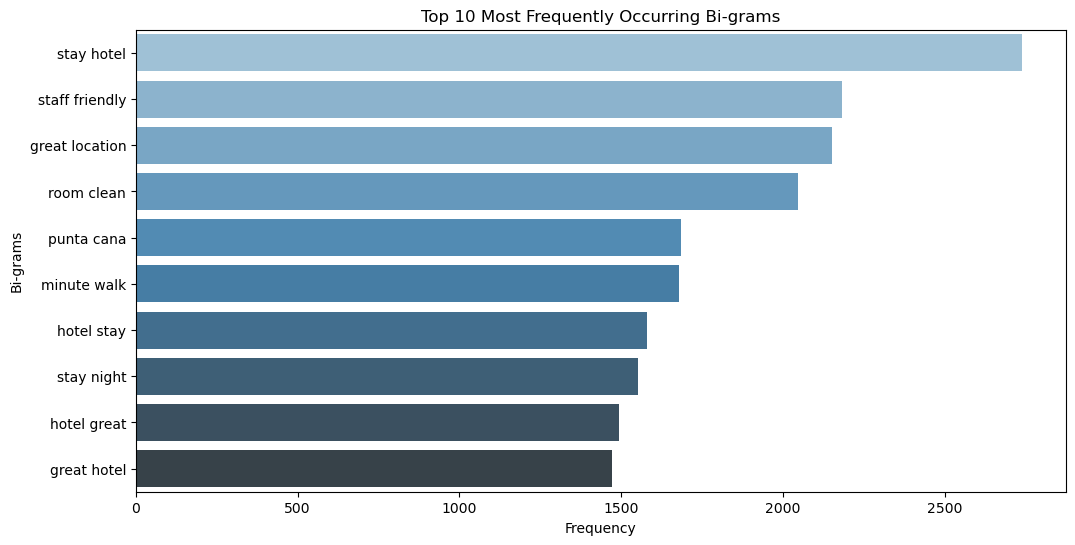

/tmp/ipykernel_8356/309536210.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='trigram', data=trigram_df, palette='Greens_d', legend=False)


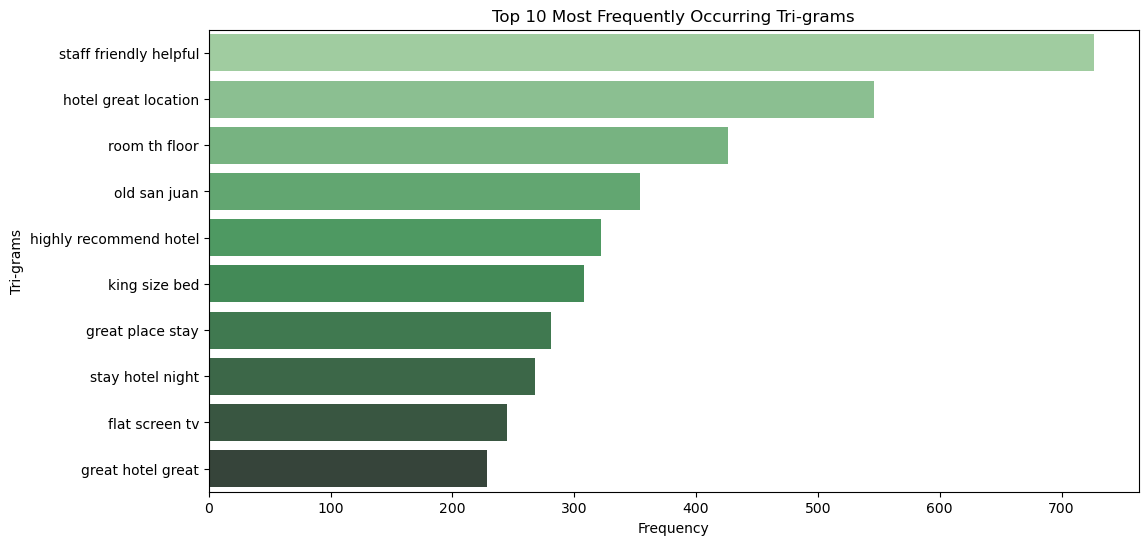

In [ ]:
bigrams = [bigram for review in df['processed_review'] for bigram in get_ngrams(review, 2)]
trigrams = [trigram for review in df['processed_review'] for trigram in get_ngrams(review, 3)]

bigram_counts = Counter(bigrams).most_common(10)
trigram_counts = Counter(trigrams).most_common(10)

bigram_df = pd.DataFrame(bigram_counts, columns=['bigram', 'count'])
trigram_df = pd.DataFrame(trigram_counts, columns=['trigram', 'count'])

# Top 10 bi-grams and tri-grams
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='bigram', data=bigram_df, palette='Blues_d', legend=False)
plt.title("Top 10 Most Frequently Occurring Bi-grams")
plt.xlabel("Frequency")
plt.ylabel("Bi-grams")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='trigram', data=trigram_df, palette='Greens_d', legend=False)
plt.title("Top 10 Most Frequently Occurring Tri-grams")
plt.xlabel("Frequency")
plt.ylabel("Tri-grams")
plt.show()